<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# **Credit Card Fraud Detection with Decision Trees and SVM**


Estimated time needed: **30** minutes


In this lab you will consolidate your machine learning (ML) modeling skills by using two popular classification models to identify fraudulent credit card transactions. These models are: Decision Tree and Support Vector Machine. You will use a real dataset of credit card transactions to train each of these models. You will then use the trained model to assess if a credit card transaction is fraudulent or not.


## Objectives


After completing this lab you will be able to:


* Perform basic data preprocessing in Python
* Model a classification task using the Scikit-Learn Python APIs
* Train Suppport Vector Machine and Decision Tree models using Scikit-Learn
* Run inference and assess the quality of the trained models


<div id="Introduction">
    <h2>Introduction</h2>
    <br>Imagine that you work for a financial institution and part of your job is to build a model that predicts if a credit card transaction is fraudulent or not. You can model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).
    <br>
    <br>You have access to transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. Thus, typically you have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).
    <br>
    <br>This is a Kaggle dataset. You can find this "Credit Card Fraud Detection" dataset from the following link: <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Credit Card Fraud Detection</a>.
<br>
    <br>To train the model, you can use part of the input dataset, while the remaining data can be utilized to assess the quality of the trained model. First, let's import the necessary libraries and download the dataset.
    <br>
</div>


<div id="import_libraries">
    <h2>Import Libraries</h2>
</div>


First, make sure that the required libraries are available. Run the cell below to ensure that.


In [1]:
# !pip install pandas==2.2.3
# !pip install scikit-learn==1.6.0
# !pip install matplotlib==3.9.3

To import the libraries that will be used in this lab, execute the cells below. 


In [2]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

Execute the cell below to load the dataset to the variable `raw_data`. The code will fetch the data set for the URL and load the same to the variable. A snapshot of the dataset will be generated as an output.


In [3]:
# Download the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# Read the input data
raw_data = pd.read_csv(url)
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<div id="dataset_analysis">
    <h2>Dataset Analysis</h2>
</div>


Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. Your objective will be to train a model that uses the other variables to predict the value of the Class variable. Let's first retrieve basic statistics about the target variable.

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.


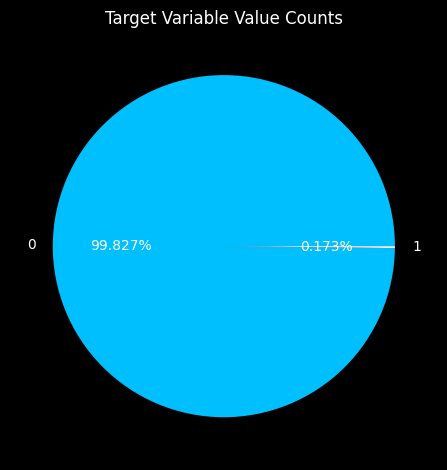

In [4]:
# Get the set of distinct classes
labels = raw_data.Class.unique()

# Get the count of each class
sizes = raw_data.Class.value_counts().values

# Plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%', colors=['deepskyblue', 'white'])
ax.set_title('Target Variable Value Counts')
plt.tight_layout()
plt.show()

As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). Thus, you need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.


It is also prudent to understand which features affect the model in what way. We can visualize the effect of the different features on the model using the code below.


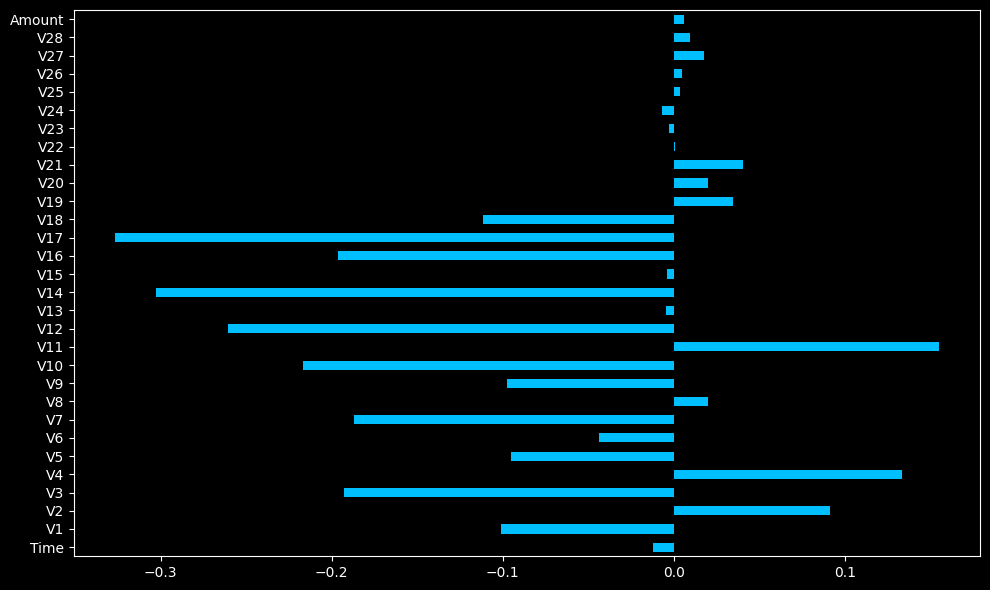

In [5]:
correlation_values = raw_data.corr()['Class'].drop('Class')
# correlation_values = correlation_values.sort_values(ascending=True)
correlation_values.plot(kind='barh', figsize=(10, 6), color='deepskyblue')
plt.tight_layout()
plt.show()

This clearly shows that some features affect the output Class more than the others. For efficient modeling, we may use only the most correlated features.

To analyze this aspect, let's order the correlation values from the highest to the lowest in terms of absolute value.


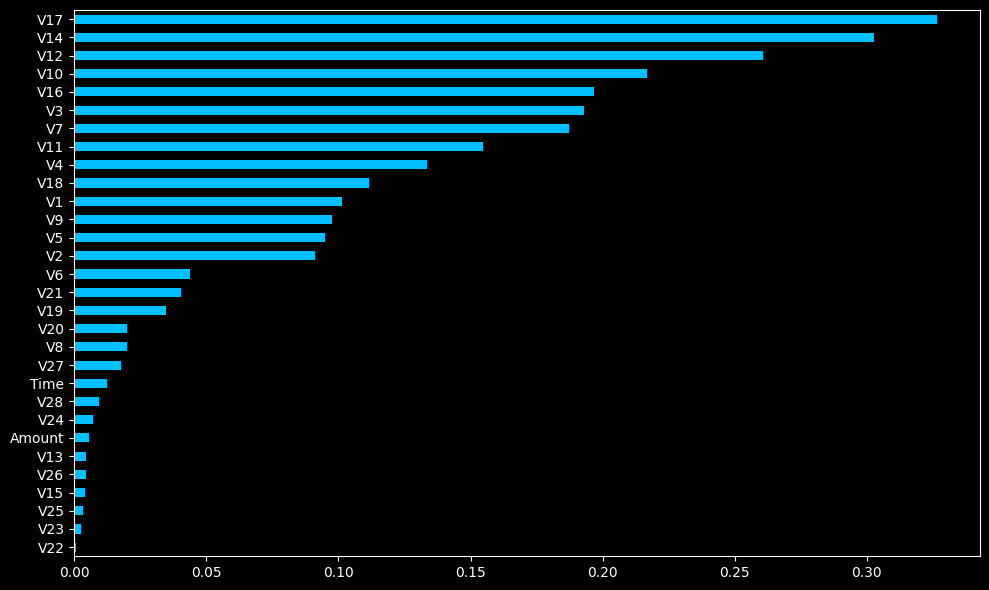

In [6]:
correlation_values = raw_data.corr()['Class'].drop('Class')
correlation_values = correlation_values.abs().sort_values(ascending=True)
correlation_values.plot(kind='barh', figsize=(10, 6), color='deepskyblue')
plt.tight_layout()
plt.show()

<div id="dataset_preprocessing">
    <h2>Dataset Preprocessing</h2>
</div>


You will now prepare the data for training. You will apply standard scaling to the input features and normalize them using $L_1$ norm for the training models to converge quickly. As seen in the data snapshot, there is a parameter called `Time` which we will not be considering for modeling. Hence, features 2 to 30 will be used as input features and feature 31, i.e. Class will be used as the target variable.


In [7]:
# Standardize features by removing the mean and scaling to unit variance
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

<div id="dataset_split">
    <h2>Dataset Train/Test Split</h2>
</div>


Now that the dataset is ready for building the classification models, you need to first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<div id="dt_sklearn">
    <h2>Build a Decision Tree Classifier model with Scikit-Learn</h2>
</div>


Compute the sample weights to be used as input to the train routine so that it takes into account the class imbalance present in this dataset.


In [9]:
w_train = compute_sample_weight('balanced', y_train)

Using these sample weights, we may train the Decision Tree classifier. We also make note of the time it takes for training this model to compare it against SVM, later in the lab.


In [10]:
# For reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

<div id="svm_sklearn">
    <h2>Build a Support Vector Machine model with Scikit-Learn</h2>
</div>


Unlike Decision Trees, we do not need to initiate a separate sample_weight for SVMs. We can simply pass a parameter in the scikit-learn function.


In [11]:
# for reproducible output across multiple function calls, set random_state to a given integer value
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

<div id="dt_sklearn_snapml">
    <h2>Evaluate the Decision Tree Classifier Models</h2>
</div>


Run the following cell to compute the probabilities of the test samples belonging to the class of fraudulent transactions. 


In [12]:
y_pred_dt = dt.predict_proba(X_test)[:,1]

Using these probabilities, we can evaluate the Area Under the Receiver Operating Characteristic Curve (ROC-AUC) score as a metric of model performance. 
The AUC-ROC score evaluates your model's ability to distinguish positive and negative classes considering all possible probability thresholds. The higher its value, the better the model is considered for separating the two classes of values.


In [13]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.939


<div id="svm_sklearn_snap">
    <h2>Evaluate the Support Vector Machine Models</h2>
</div>


Run the following cell to compute the probabilities of the test samples belonging to the class of fraudulent transactions. 


In [14]:
y_pred_svm = svm.decision_function(X_test)

You may now evaluate the accuracy of SVM on the test set in terms of the ROC-AUC score.


In [15]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986


## Practice Exercises
Based on what you have learnt in this lab, attempt the following questions.


Q1. Currently, we have used all 30 features of the dataset for training the models. Use the `corr()` function to find the top 6 features of the dataset to train the models on. 


V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
Name: Class, dtype: float64

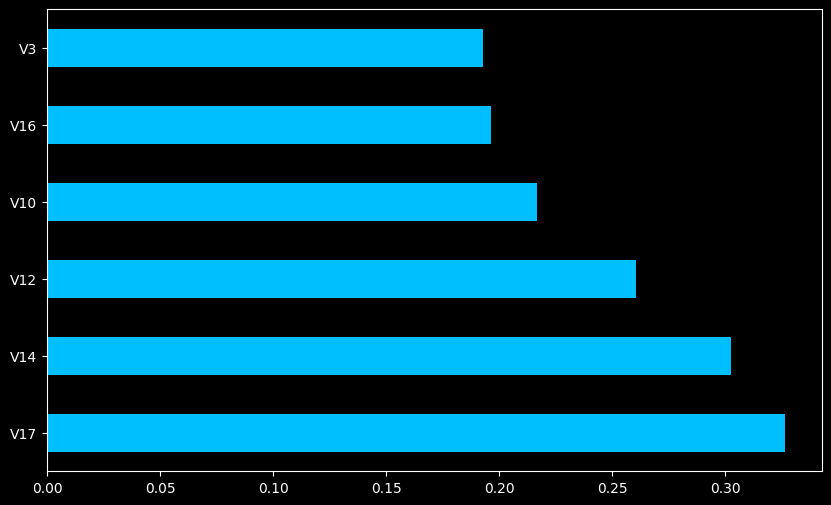

In [16]:
correlation_values = abs(raw_data.corr()['Class']).drop('Class')
correlation_values = correlation_values.sort_values(ascending=False)[:6]
correlation_values.plot(kind='barh', figsize=(10, 6), color='deepskyblue')
correlation_values

<details><summary>Click here for solution</summary>

```python
correlation_values = abs(raw_data.corr()['Class']).drop('Class')
correlation_values = correlation_values.sort_values(ascending=False)[:6]
correlation_values
```

<br>
The answer should be 'V3','V10','V12','V14','V16' and 'V17'.
</details>


Q2. Using only these 6 features, modify the input variable for training.


In [17]:
top_features = ['V3', 'V10', 'V12', 'V14', 'V17']
top_features_indices = [raw_data.columns.get_loc(feature) for feature in top_features]

X_selected = data_matrix[:, top_features_indices]
X_selected = normalize(X, norm="l1")

<details><summary>Click here for solution</summary>
Replace the statement defining the variable `X` with the following and run the cell again.
<br>

```python
X = data_matrix[:,[3,10,12,14,16,17]]
```

</details>


Q3. Execute the Decision Tree model for this modified input variable. How does the value of ROC-AUC metric change?


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

w_train = compute_sample_weight('balanced', y_train)

dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)

y_pred_dt = dt.predict_proba(X_test)[:,1]

roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.939


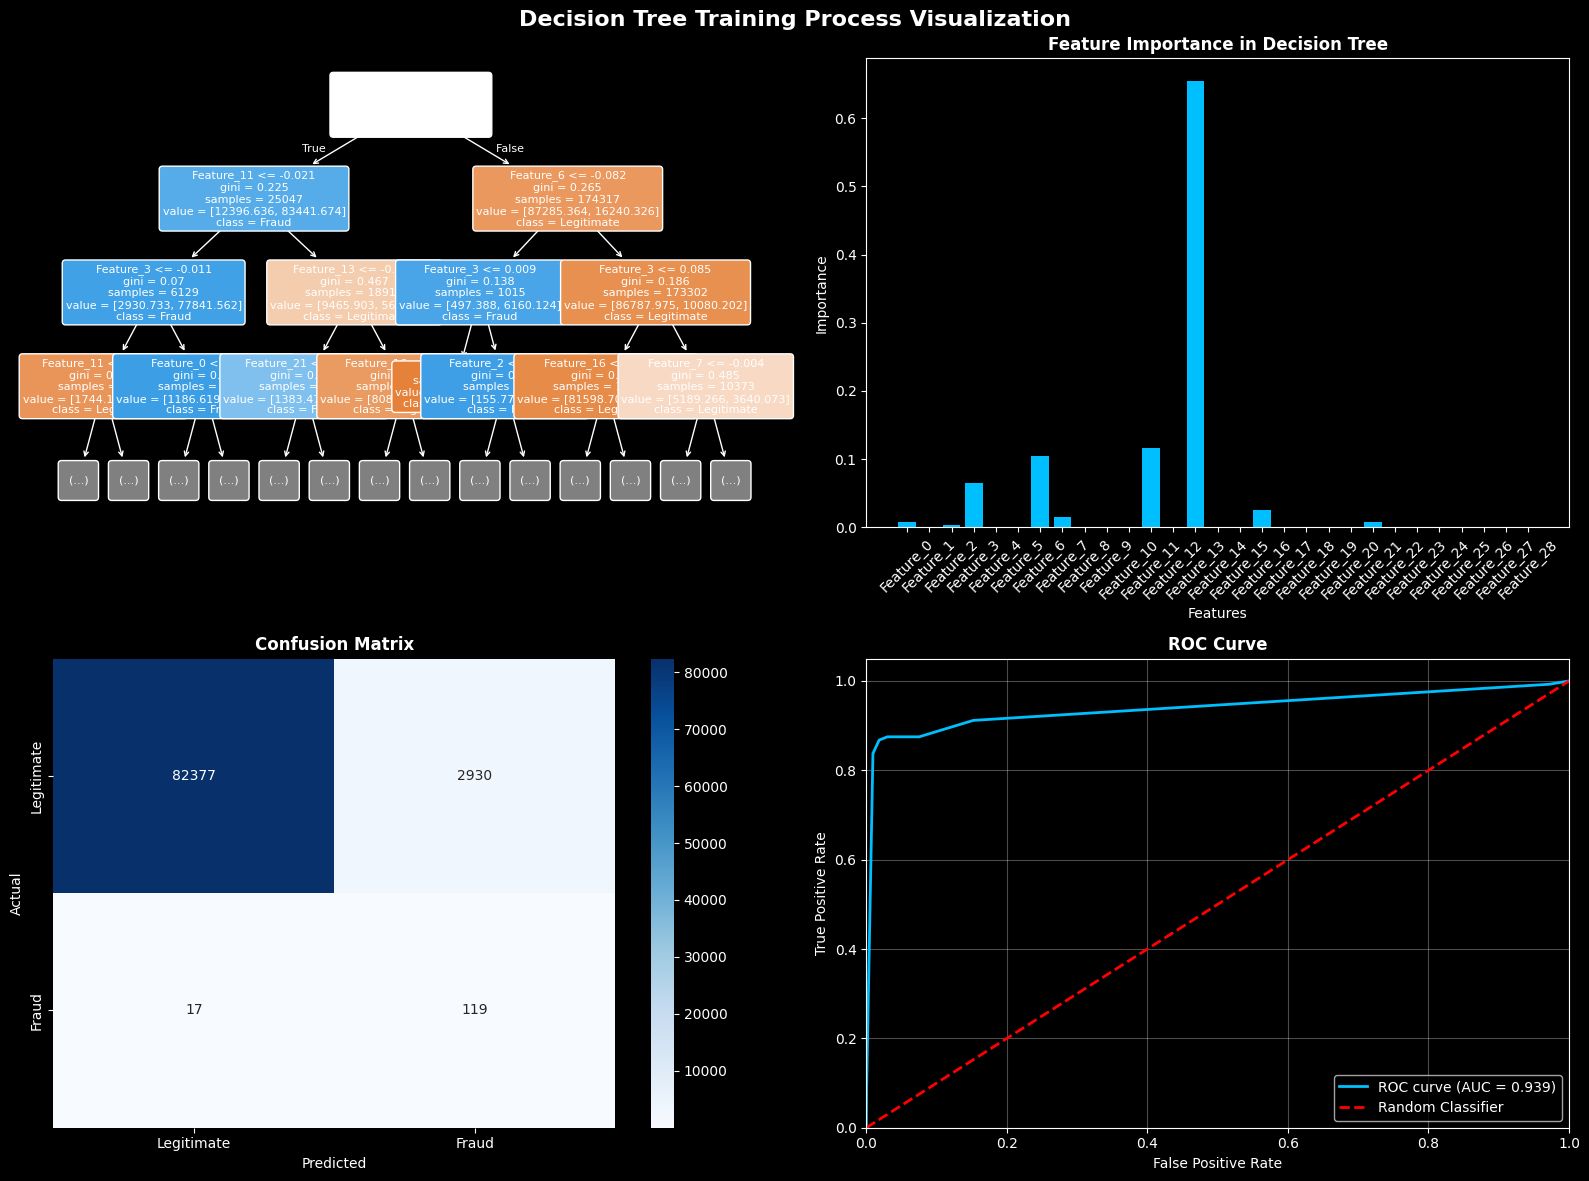


DECISION TREE TRAINING SUMMARY
Training samples: 199364
Test samples: 85443
Number of features used: 29
Tree depth: 4
Number of leaves: 15
ROC-AUC Score: 0.939

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.97      0.98     85307
       Fraud       0.04      0.88      0.07       136

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443



In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Decision Tree Training Process Visualization', fontsize=16, fontweight='bold')

# 1. Visualize the actual decision tree structure
axes[0, 0].set_title('Decision Tree Structure (Top 3 Levels)', fontsize=12, fontweight='bold')
plot_tree(dt, 
          max_depth=3,  # Show only top 3 levels for readability
          feature_names=[f'Feature_{i}' for i in range(X_train.shape[1])],
          class_names=['Legitimate', 'Fraud'],
          filled=True,
          rounded=True,
          fontsize=8,
          ax=axes[0, 0])

# 2. Feature importance visualization
feature_importance = dt.feature_importances_
feature_names = [f'Feature_{i}' for i in range(len(feature_importance))]
axes[0, 1].bar(feature_names, feature_importance, color='deepskyblue')
axes[0, 1].set_title('Feature Importance in Decision Tree', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Features')
axes[0, 1].set_ylabel('Importance')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Confusion Matrix
y_pred_binary = (y_pred_dt > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'],
            ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# 4. ROC Curve and AUC visualization
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

axes[1, 1].plot(fpr, tpr, color='deepskyblue', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[1, 1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', 
                label='Random Classifier')
axes[1, 1].set_xlim([0.0, 1.0])
axes[1, 1].set_ylim([0.0, 1.05])
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('ROC Curve', fontsize=12, fontweight='bold')
axes[1, 1].legend(loc="lower right")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional visualization: Training vs Test Performance
print("\n" + "="*50)
print("DECISION TREE TRAINING SUMMARY")
print("="*50)
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Number of features used: {X_train.shape[1]}")
print(f"Tree depth: {dt.get_depth()}")
print(f"Number of leaves: {dt.get_n_leaves()}")
print(f"ROC-AUC Score: {roc_auc_dt:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary, 
                          target_names=['Legitimate', 'Fraud']))

<details><summary>Click here for solution</summary>
You should observe an increase in the ROC-AUC value with this change for the Decision Tree model.
</details>


Q4. Execute the SVM model for this modified input variable. How does the value of ROC-AUC metric change?


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

y_pred_svm = svm.decision_function(X_test)

roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

print('SVM ROC-AUC score : {0:.3f}'.format(roc_auc_svm))

SVM ROC-AUC score : 0.986


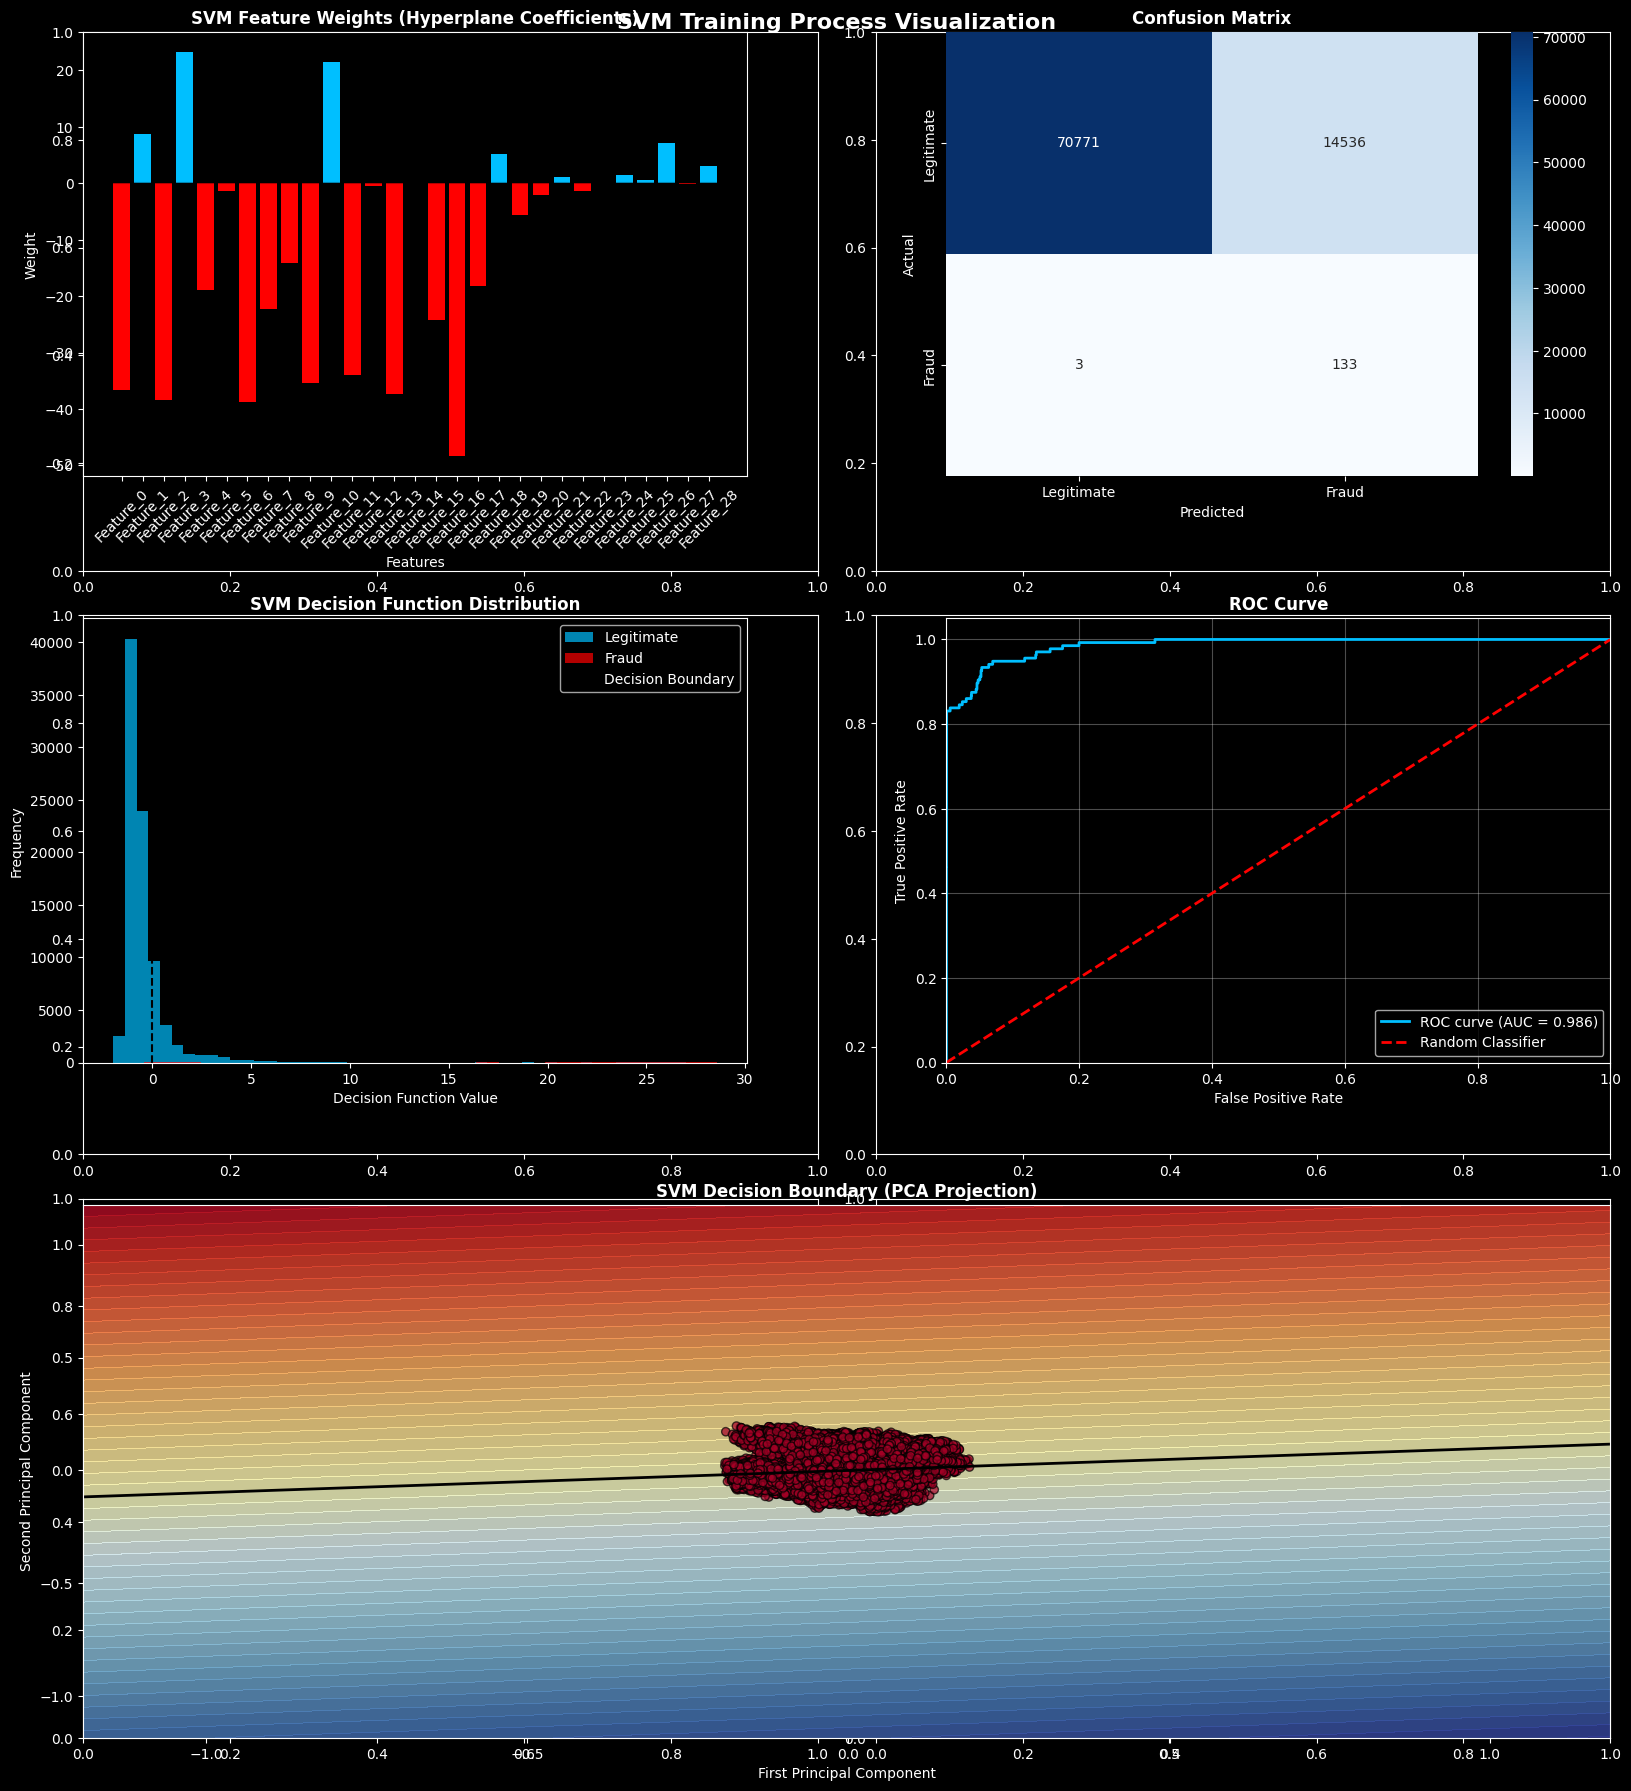


SVM TRAINING SUMMARY
Training samples: 199364
Test samples: 85443
Number of features used: 29
ROC-AUC Score: 0.986
Number of support vectors: 29

Top 3 Most Important Features (by absolute weight):
1. Feature_16: -48.332645
2. Feature_6: -38.788539
3. Feature_2: -38.432921

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.83      0.91     85307
       Fraud       0.01      0.98      0.02       136

    accuracy                           0.83     85443
   macro avg       0.50      0.90      0.46     85443
weighted avg       1.00      0.83      0.91     85443



In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('SVM Training Process Visualization', fontsize=16, fontweight='bold')

# Create a grid layout: 3 rows, 2 columns
gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1.2], hspace=0.3, wspace=0.3)

# Top row plots
ax1 = fig.add_subplot(gs[0, 0])  # Feature weights
ax2 = fig.add_subplot(gs[0, 1])  # Confusion matrix
ax3 = fig.add_subplot(gs[1, 0])  # Decision function distribution
ax4 = fig.add_subplot(gs[1, 1])  # ROC curve
ax5 = fig.add_subplot(gs[2, :])  # Decision boundary (spans both columns)

# 1. Feature weights visualization (SVM coefficients)
feature_weights = svm.coef_[0]  # Get the coefficients for the hyperplane
feature_names = [f'Feature_{i}' for i in range(len(feature_weights))]
colors = ['red' if w < 0 else 'deepskyblue' for w in feature_weights]

ax1.bar(feature_names, feature_weights, color=colors)
ax1.set_title('SVM Feature Weights (Hyperplane Coefficients)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Features')
ax1.set_ylabel('Weight')
ax1.tick_params(axis='x', rotation=45)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 2. Confusion Matrix
y_pred_binary = (y_pred_svm > 0).astype(int)  # SVM uses decision_function, threshold at 0
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'],
            ax=ax2)
ax2.set_title('Confusion Matrix', fontsize=12, fontweight='bold')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

# 3. Decision Function Distribution
ax3.hist(y_pred_svm[y_test == 0], bins=50, alpha=0.7, label='Legitimate', color='deepskyblue')
ax3.hist(y_pred_svm[y_test == 1], bins=50, alpha=0.7, label='Fraud', color='red')
ax3.axvline(x=0, color='black', linestyle='--', label='Decision Boundary')
ax3.set_title('SVM Decision Function Distribution', fontsize=12, fontweight='bold')
ax3.set_xlabel('Decision Function Value')
ax3.set_ylabel('Frequency')
ax3.legend()

# 4. ROC Curve and AUC visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)

ax4.plot(fpr, tpr, color='deepskyblue', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.3f})')
ax4.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', 
                label='Random Classifier')
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('ROC Curve', fontsize=12, fontweight='bold')
ax4.legend(loc="lower right")
ax4.grid(True, alpha=0.3)

# 5. Decision boundary visualization using PCA for 2D projection
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a mesh for decision boundary
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train SVM on PCA-transformed data for visualization
svm_pca = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
svm_pca.fit(X_train_pca, y_train)

# Get decision boundary
Z = svm_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
ax5.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
ax5.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# Plot training points
scatter = ax5.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, 
                            cmap='RdYlBu', edgecolors='black', alpha=0.7)
ax5.set_title('SVM Decision Boundary (PCA Projection)', fontsize=12, fontweight='bold')
ax5.set_xlabel('First Principal Component')
ax5.set_ylabel('Second Principal Component')

plt.tight_layout()
plt.show()

# Additional visualization: Support Vector analysis
print("\n" + "="*50)
print("SVM TRAINING SUMMARY")
print("="*50)
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Number of features used: {X_train.shape[1]}")
print(f"ROC-AUC Score: {roc_auc_svm:.3f}")
print(f"Number of support vectors: {len(svm.coef_[0])}")
print("\nTop 3 Most Important Features (by absolute weight):")
feature_importance_indices = np.argsort(np.abs(feature_weights))[::-1][:3]
for i, idx in enumerate(feature_importance_indices):
    print(f"{i+1}. Feature_{idx}: {feature_weights[idx]:.6f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary, 
                          target_names=['Legitimate', 'Fraud']))

<details><summary>Click here for solution</summary>
You should observe a decrease in the ROC-AUC value with this change for the SVM model.
</details>


Q5. What are the inferences you can draw about Decision Trees and SVMs with what you have learnt in this lab?


<details><summary>Click here for solution</summary>

- With a larger set of features, SVM performed relatively better in comparison to the Decision Trees.
- Decision Trees benefited from feature selection and performed better.
- SVMs may require higher feature dimensionality to create an efficient decision hyperplane.
</details>


### Congratulations! You're ready to move on to your next lesson!
 
## Author
 
<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" target="_blank">Abishek Gagneja</a>
 
 
 ### Other Contributors
 
<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>

<!--
## Changelog
 
| Date | Version | Changed by | Change Description |

|:------------|:------|:------------------|:---------------------------------------|

| 2024--1405 | 1.|0  Abhishek Gagnean    | Update content and practice exercis|es>
 


## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
